In [55]:
# Importaciones

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metodos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Algoritmos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Cargar dataset

df = pd.read_csv("../Ventas.csv")
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [4]:
# Exploración

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [5]:
df.describe()

,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365.000000,365.000000,365.000000,365.000000
mean,4.005479,0.200000,0.142466,2997.219178
std,2.002738,0.400549,0.350007,942.096284
min,1.000000,0.000000,0.000000,1305.000000
25%,2.000000,0.000000,0.000000,2195.000000
50%,4.000000,0.000000,0.000000,3074.000000
75%,6.000000,0.000000,0.000000,3979.000000
max,7.000000,1.000000,1.000000,4404.000000


In [8]:
# Formateo de fecha

df["Fecha"] = pd.to_datetime(df["Fecha"])
df["Fecha"]

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
360   2022-12-27
361   2022-12-28
362   2022-12-29
363   2022-12-30
364   2022-12-31
Name: Fecha, Length: 365, dtype: datetime64[ns]

In [18]:
# Escalar y normalizar el dataframe

scale = MinMaxScaler(feature_range=(0,1))

# Se eliminan las columnas que no se deben escalar

columns_to_scale = df.drop(columns=["Ventas", "Fecha"], axis=1).columns

normalize = scale.fit_transform(df[columns_to_scale])

df_scaled = pd.DataFrame(data=normalize, columns=columns_to_scale)

# Se añaden nuevamente las columnas droppeadas

df_scaled["Ventas"] = df["Ventas"]
df_scaled["Fecha"] = df["Fecha"]

df_scaled.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [20]:
# Variables dependientes e Independientes

X = df_scaled.drop(columns=["Fecha","Ventas"], axis=1)
y = df_scaled["Ventas"]

0      4033
1      4012
2      1608
3      2046
4      2484
       ... 
360    2189
361    2548
362    3018
363    3591
364    4351
Name: Ventas, Length: 365, dtype: int64

In [59]:
# Dividir las variables para entrenar y testing

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45, train_size=0.8)

In [27]:
# EDA

df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


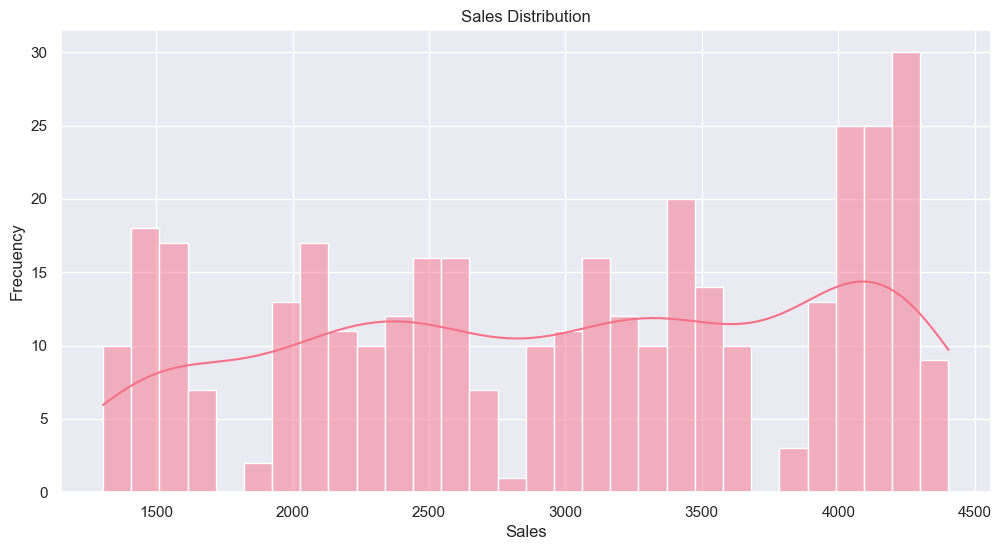

In [43]:
sns.set_theme(palette="husl", style="darkgrid")

plt.figure(figsize=(12,6))
sns.histplot(df["Ventas"], kde=True, bins=30)
plt.ylabel("Frecuency")
plt.xlabel("Sales")
plt.title("Sales Distribution");

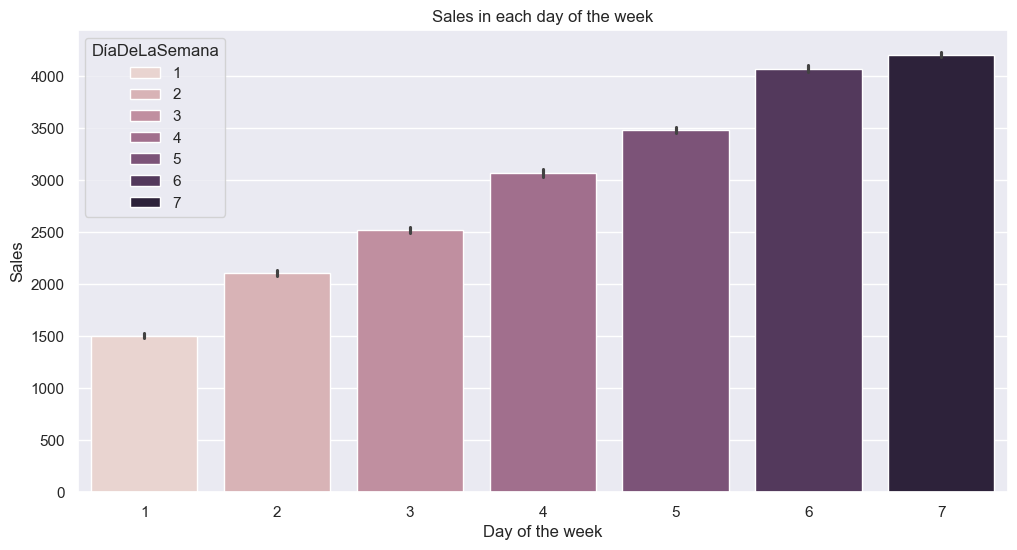

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="DíaDeLaSemana", y="Ventas", hue="DíaDeLaSemana")
plt.title("Sales in each day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Sales");

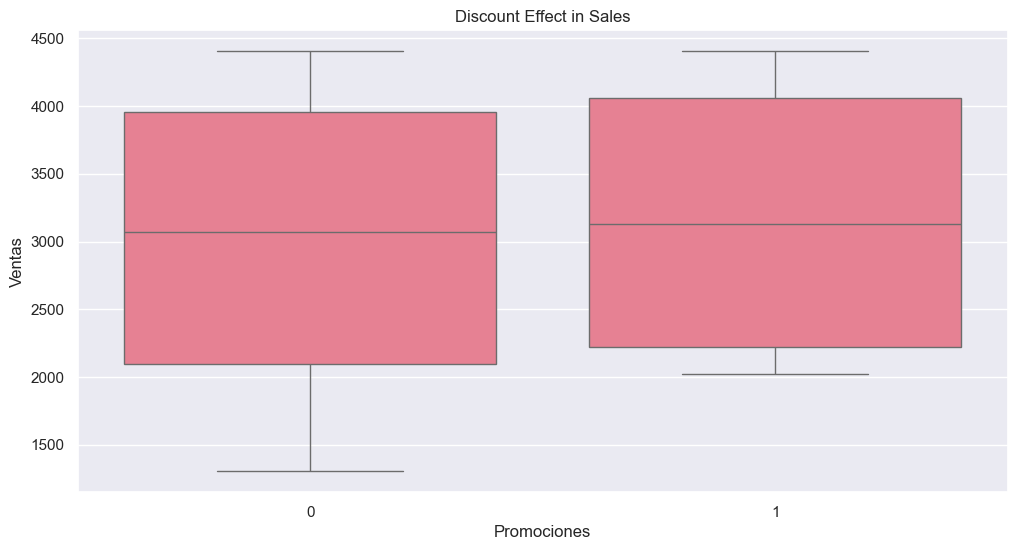

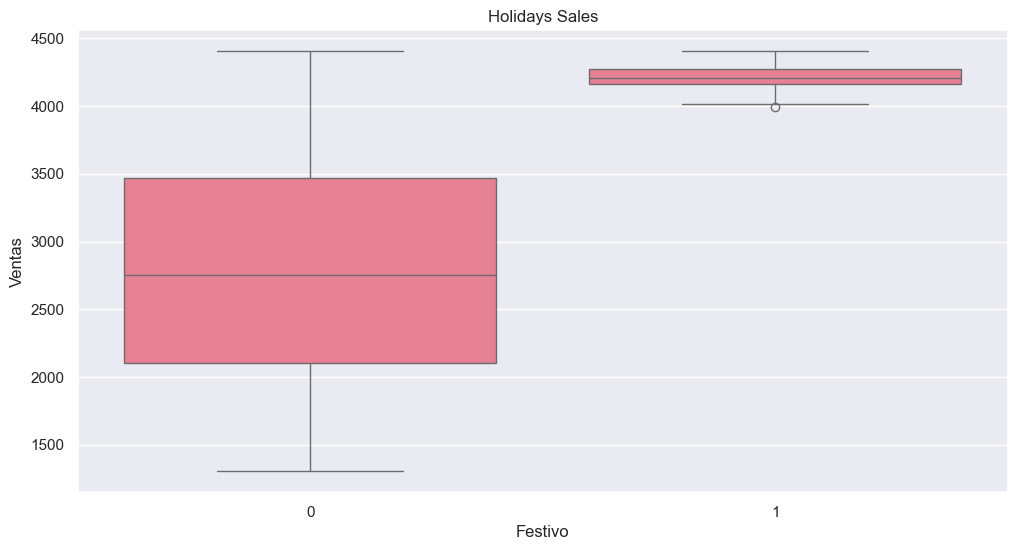

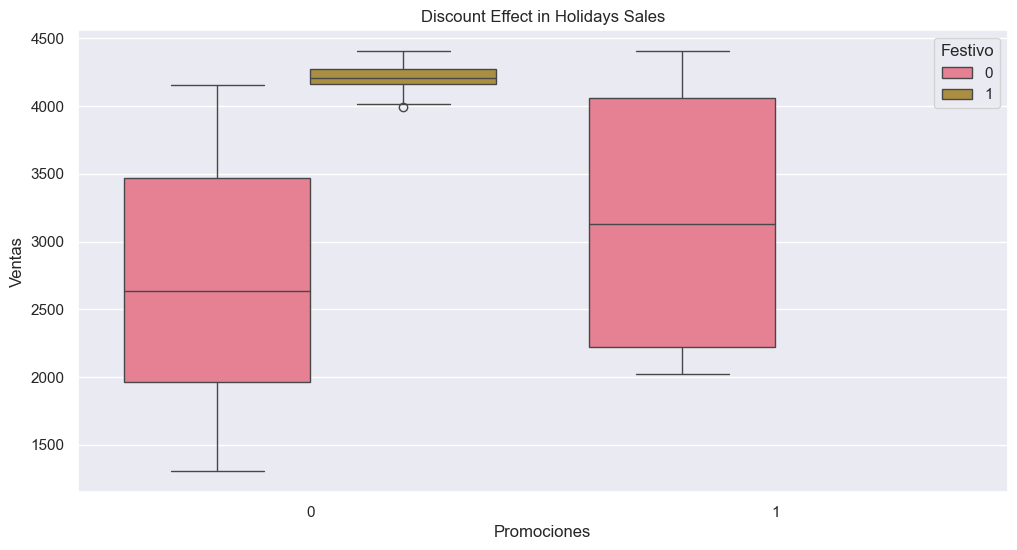

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,y="Ventas",x="Promociones")
plt.title("Discount Effect in Sales")

plt.figure(figsize=(12,6))
sns.boxplot(data=df,y="Ventas",x="Festivo")
plt.title("Holidays Sales")

plt.figure(figsize=(12,6))
sns.boxplot(data=df,y="Ventas",x="Promociones", hue="Festivo")
plt.title("Discount Effect in Holidays Sales");

In [57]:
# Selección del Modelo

models = [
    ("R Lineal", LinearRegression()),
    ("R Logica", LogisticRegression()),
    ("Arbol", DecisionTreeRegressor(random_state=32)),
    ("Bosque", RandomForestRegressor(random_state=32))
]

for name, model in models:
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    print(f"{name}: {score:.8f}")

R Lineal: 0.98981983
R Logica: 0.02397260
Arbol: 0.99001129
Bosque: 0.99000717


In [60]:
# Entrenamiento y evaluacion

linear_model = LinearRegression()

linear_model.fit(X_train,y_train)

predictions = linear_model.predict(X_test)

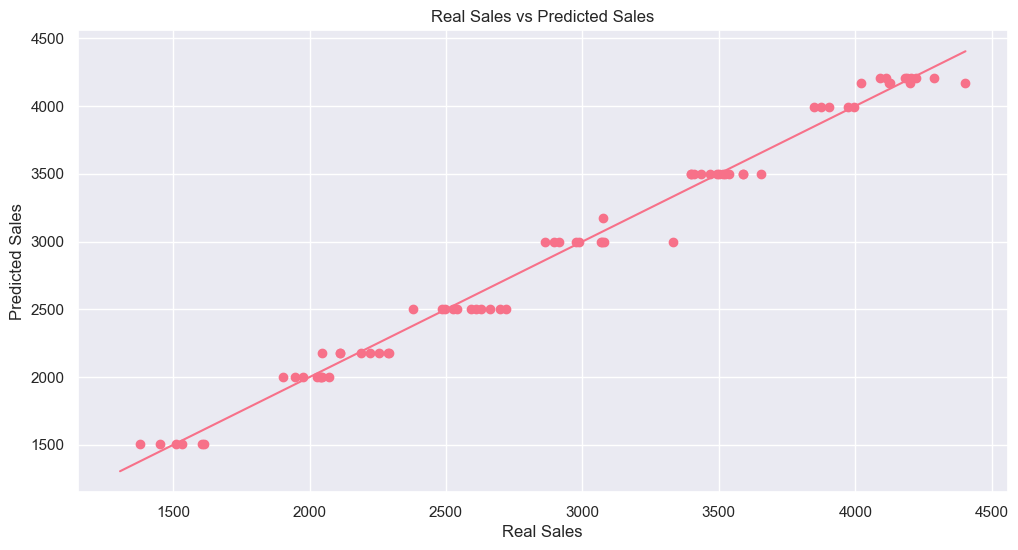

In [63]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions);
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.ylabel("Predicted Sales")
plt.xlabel("Real Sales")
plt.title("Real Sales vs Predicted Sales");

### Insights

1. Predictions are correct: The real sales are following a liner progression compared with the predicted sales, that suggest that the store is fulfilling the sales expectations.
2. Store promotions is equal to more sales: The store promotions affects greatly the sales, so the store must have additional stocks to complement the lack of any product.
3. Holidays are great for sales: The holidays greatly increase the sales too, so the store needs to aim to a great marketing campaing in those days of the year.
